### Nourine Sabry - 211000198
# Parkinson's Disease Prediction Using Machine Learning #
***
<center> <img src="Parkinsons-disease-3.jpg" width="500" height="300"> <center>
<Center> Parkinson's disease (PD) is the second most common progressive neurodegenerative disease. PD symptoms include tremor, rigidity, cognitive impairment, and gastrointestinal issues. Diagnosing PD often relies on medical observations of motor symptoms, but in cases of early non-motor symptoms, subtle and mild symptoms might be overlooked. The aim of this project is to implement a machine learning model to try and predict whether a patient has PD or not based on speech features.</center>

***
**Link to dataset:** https://www.kaggle.com/datasets/dipayanbiswas/parkinsons-disease-speech-signal-features/data 

### Importing libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math

### Import dataset

In [58]:
data=pd.read_csv("pd_speech_features.csv")

### Data exploration & preprocessing

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [60]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [61]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
data.shape

(756, 755)

### PD usually affects more males than females, let's see if the data agrees with this:

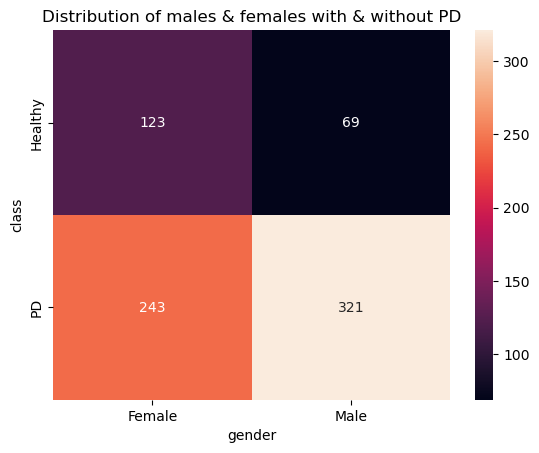

In [6]:
heatmapdata = pd.crosstab(data['class'], data['gender'])
sns.heatmap(heatmapdata, yticklabels=['Healthy', 'PD'], xticklabels=['Female', 'Male'], annot=True, fmt='d')
plt.title('Distribution of males & females with & without PD')
plt.show()

### Let's see how correlated the features are:

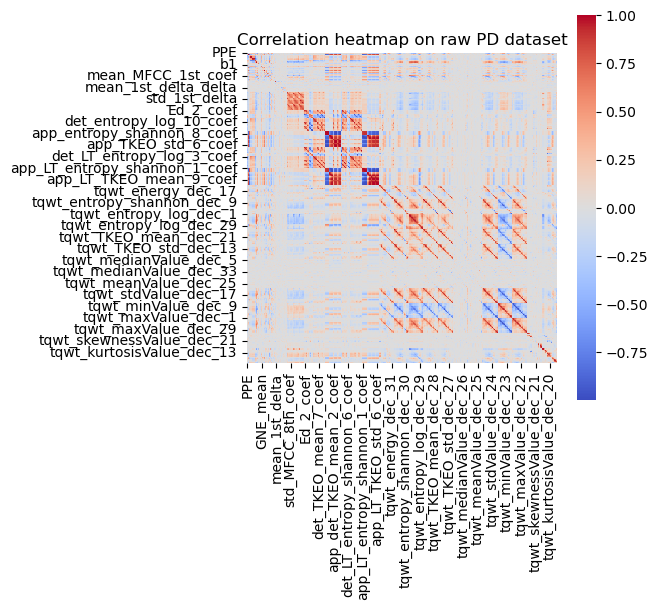

In [14]:
corr_matr = data.drop(columns=['id', 'gender']).corr(method='pearson')
plt.figure(figsize=(5,5))
sns.heatmap(corr_matr, cmap='coolwarm', square=True)
plt.title("Correlation heatmap on raw PD dataset")
plt.show()

### Uh oh, highly correlated features are not good! Let's remove them:

**Q: What are highly correlated features? And what's so bad about them?**
- **A:** Highly correlated features are variables that have a strong linear relationship with each other; most medical datasets tend to have highly correlated features. Highly correlated features are redundant and can increase the complexity of the model. Also, highly correlated features make it difficult to determine the importance of each feature and thus introduce ambiguity. Overall, it is crucial to remove highly correlated features in order to improve model performance and interpretability, as well as reduce the computational power needed, making it faster to train the model.
- **Further reading:** https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18

In [65]:
X = data.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, data['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = data['class']
data = filtered_data

C:\Users\Nourine\AppData\Local\Temp\ipykernel_9468\3167163935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = data['class']


In [13]:
data.shape

(756, 31)

### Good! We've reduced the number of feature to 30 instead of the overwhelming 755!

### Now let's see how balanced the data is:

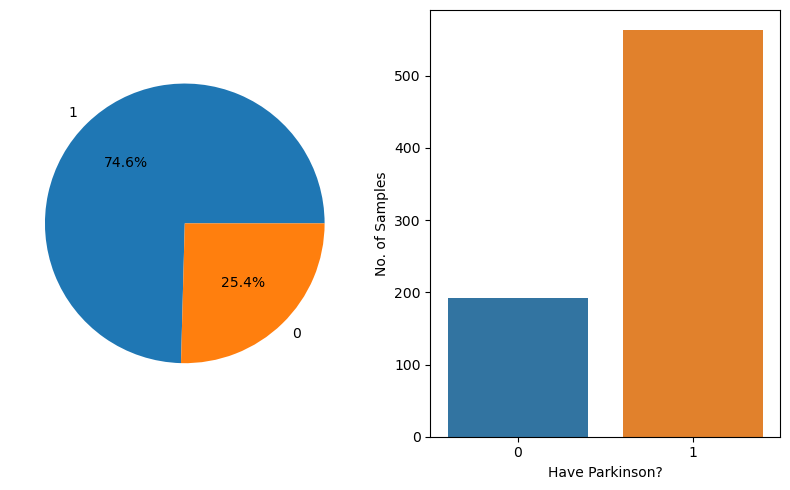

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
piedata = data['class'].value_counts()
ax1.pie(piedata.values, labels=piedata.index, autopct='%1.1f%%')
countimbalanced=sns.countplot(data=data, x='class', ax=ax2)
countimbalanced.set(ylabel='No. of Samples', xlabel='Have Parkinson?')
plt.tight_layout()
plt.show()

### Yikes! The data is highly imbalanced, let's see what we can do about this:

**Q:** What does it mean when the data is imbalanced? Why does it need to be balanced?
- **A:** Imbalanced data means that the distribution of the dataset is not properly balanced in the different classes. In our example, the minority class (0-> healthy, no pd) is underrepresented, accounting for only 25.4% of cases. If we try training the model without first balancing the dataset, the model will be biased against the majority class (1-> patients with PD). Thus, it is crucial to balance the data for higher prediction accuracy
- **Further reading:** https://medium.com/game-of-bits/how-to-deal-with-imbalanced-data-in-classification-bd03cfc66066

In [66]:
majority= data[data['class'] == 1]
minority= data[data['class'] == 0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=38)
balanced_data = pd.concat([majority, minority_upsampled])
print("Class distribution after balancing the data:")
print(balanced_data['class'].value_counts())

Class distribution after balancing the data:
class
1    564
0    564
Name: count, dtype: int64


### Separating features, splitting the dataset, & feature scaling:

In [4]:
y = balanced_data.loc[:,'class']
X = balanced_data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [5]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Testing different machine learning models:

**Q: Why do we need to test multiple machine learning models?**
- **A:** Every model has its own strengths and limitations, when you test different models, you are able to compare between their performances and determine which one is best for your project.

#### Model 1: SVM RBF

**Q:** What is a support vector machine (SVM)? 
- **A:** SVM is a machine learning algorithm that can be used to solve both regression and classification problems. It creates a hyperplane that separates data into classes.
- **Q:** What is radial basis function (RBF) SVM?
- **A:** The RBF kernel is a SVM kernel used in classification problems where the dataset cannot be linearly separated.
- **Further reading:** https://medium.com/analytics-vidhya/introduction-to-svm-and-kernel-trick-part-1-theory-d990e2872ace

In [51]:
svmmodel = SVC(kernel='rbf')
svmmodel.fit(X_train, y_train)

SVC()

In [52]:
pred_test = svmmodel.predict(X_test)
testaccuracy= accuracy_score(y_test, pred_test)
print("SVM RBF model accuracy:", testaccuracy)

SVM RBF model accuracy: 0.9026548672566371


In [53]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_test))


Confusion Matrix:
[[ 98  12]
 [ 10 106]]


In [54]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.90      0.91      0.91       116

    accuracy                           0.90       226
   macro avg       0.90      0.90      0.90       226
weighted avg       0.90      0.90      0.90       226



In [67]:
feature_names=data.columns
feature_importance = pd.DataFrame(feature_names, columns=["feature"])
feature_importance = feature_importance.sort_values(by=['feature'], ascending=False)
feature_importance

,feature
21,tqwt_stdValue_dec_16
20,tqwt_stdValue_dec_15
19,tqwt_stdValue_dec_12
18,tqwt_stdValue_dec_11
24,tqwt_maxValue_dec_13
23,tqwt_maxValue_dec_12
22,tqwt_maxValue_dec_11
29,tqwt_kurtosisValue_dec_36
28,tqwt_kurtosisValue_dec_28
27,tqwt_kurtosisValue_dec_27


#### Model 2: Logistic regression

**Q: What is logistic regression?**
- **A:** Logistic regression is a machine learning algorithm used to solve classification problems. It uses sigmoid (logistic) function to find the relationships between variables.
- **Further reading:** https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\Users\Nourine\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
y_pred = logmodel.predict(X_test)
logaccuracy = accuracy_score(y_test, y_pred)
print("Logistic regression accuracy:", logaccuracy)

Logistic regression accuracy: 0.911504424778761


In [17]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[104   6]
 [ 14 102]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.94      0.88      0.91       116

    accuracy                           0.91       226
   macro avg       0.91      0.91      0.91       226
weighted avg       0.91      0.91      0.91       226



In [48]:
feature_names=data.columns
feature_importance = pd.DataFrame(feature_names, columns=["feature"])
feature_importance = feature_importance.sort_values(by=['feature'], ascending=False)
feature_importance

,feature
21,tqwt_stdValue_dec_16
20,tqwt_stdValue_dec_15
19,tqwt_stdValue_dec_12
18,tqwt_stdValue_dec_11
24,tqwt_maxValue_dec_13
23,tqwt_maxValue_dec_12
22,tqwt_maxValue_dec_11
29,tqwt_kurtosisValue_dec_36
28,tqwt_kurtosisValue_dec_28
27,tqwt_kurtosisValue_dec_27


**Q: What is a confusion matrix? And how do I interpret one?**
- **A:** A confusion matrix is a table that helps us understand how well a model's predictions perform by showing how many predictions are correct or incorrect per class. In a confusion matrix, columns represent predictions made my the model and rows represent the actual classes (general format).  
- TP: true positive, indicating the number of positive cases that are correctly
classified by the classifier.
- TN: true negative, indicating the number of negative cases that are correctly classified by the classifier.
- FP: false positive, indicating the number of positive cases that are incorrectly classified by the classifier.
- FN: false negative, indicating the number of negative cases that are incorrectly classified by the classifier.
- A good model will have high TP and TN rates and low FP and FN rates.
- **Further reading:** https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
<center> <img src="644aea65cefe35380f198a5a_class_guide_cm08.png" width="500" height="300"> <center>


### Result interpretation:

#### Both models performed well, although logistic regression performed slightly better than SVM RBF, with 91.1% accuracy and 90.2% accuracy, respectively. Both models achieved a high F1 score, again, logistic regression has a slightly higher score than SVM RBF. 

### Further reading on Parkinson's disease:
- Bloem, B. R., Okun, M. S., & Klein, C. (2021). Parkinson’s disease. The Lancet, 397(10291), 2284–2303. https://doi.org/10.1016/S0140-6736(21)00218-X
- Marino, B. L. B., de Souza, L. R., Sousa, K. P. A., Ferreira, J. V., Padilha, E. C., da Silva, C. H. T. P., Taft, C. A., & Hage-Melim, L. I. S. (2019). Parkinson’s Disease: A Review from Pathophysiology to Treatment. Mini-Reviews in Medicinal Chemistry, 20(9), 754–767. https://doi.org/10.2174/1389557519666191104110908
- Mei, J., Desrosiers, C., & Frasnelli, J. (2021). Machine Learning for the Diagnosis of Parkinson’s Disease: A Review of Literature. Frontiers in Aging Neuroscience, 13, 633752. https://doi.org/10.3389/FNAGI.2021.633752/BIBTEX
